#**CS334-Machine Learning Tutorial 1**

Hassaan Ahmad Waqar

##**Topic: Regression Models using Scikit Learn** 

##**Part 1: Linear Regression** <br> <br>
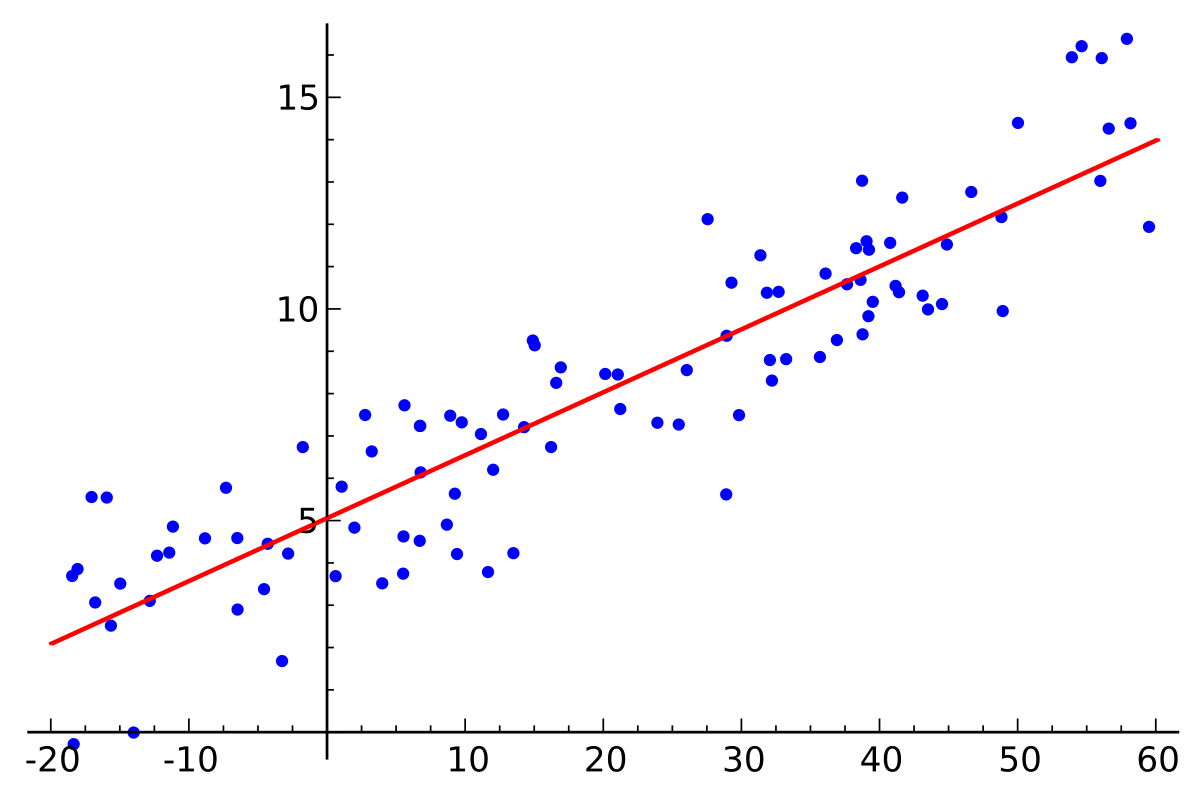

Scikit Learn Reference:<br> https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit <br>
More on Linear Regression: https://towardsdatascience.com/linear-regression-detailed-view-ea73175f6e86

###**Dataset: Medical Cost Insurance Dataset** <br> 
The dataset has been obtained from Kaggle: https://www.kaggle.com/mirichoi0218/insurance <br>
It contains a public record of patients, and their health insurance costs


####**Columns** <br>

**age:** age of primary beneficiary

**sex:** insurance contractor gender, female, male

**bmi:** Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

**children:** Number of children covered by health insurance / Number of dependents

**smoker:** Smoking

**region:** the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

**charges:** Individual medical costs billed by health insurance


####**Task** 
Can you accurately predict insurance costs?

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

In [3]:
data = pd.read_csv('insurance.csv')
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
 data.info() # No nulls which is a good sign

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**Encoding**

In [5]:
# One Hot Encoding
one_hot = pd.get_dummies(data['region'])
# Ordinal Encoding
data['sex'] = data['sex'].map({'female': 1, 'male': 2})
data['smoker'] = data['smoker'].map({'yes': 1, 'no': 0})

data.drop(columns=['region'], inplace = True)
data= pd.concat([data, one_hot], axis=1, join="inner")

In [6]:
# How can we use Sklean here as well? 
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
data['sex'] = le.fit_transform(data['sex'])
data['smoker'] = le.fit_transform(data['smoker'])

# We get almost the same results

In [7]:
data.head(5)

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


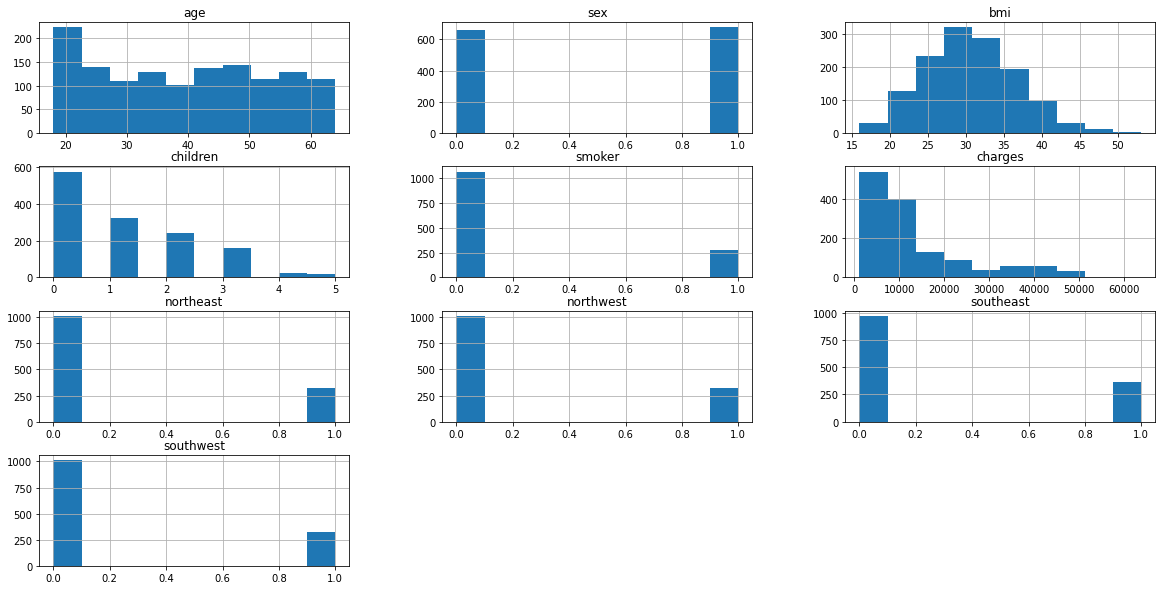

In [8]:
fig = plt.figure(figsize = (20,10))
ax = fig.gca()
data.hist(ax=ax)
plt.show()

In [9]:
X = data.loc[:,['age', 'sex', 'bmi', 'children', 'smoker', 'northeast', 'southeast', 'northwest', 'southwest']].values
y = data.loc[:, ['charges']].values

In [10]:
# Feature Set
print("Shape of Feature Set:", X.shape)
X

Shape of Feature Set: (1338, 9)


array([[19.  ,  0.  , 27.9 , ...,  0.  ,  0.  ,  1.  ],
       [18.  ,  1.  , 33.77, ...,  1.  ,  0.  ,  0.  ],
       [28.  ,  1.  , 33.  , ...,  1.  ,  0.  ,  0.  ],
       ...,
       [18.  ,  0.  , 36.85, ...,  1.  ,  0.  ,  0.  ],
       [21.  ,  0.  , 25.8 , ...,  0.  ,  0.  ,  1.  ],
       [61.  ,  0.  , 29.07, ...,  0.  ,  1.  ,  0.  ]])

In [11]:
# Medical Charges
print("Shape of Y:", y.shape)
y

Shape of Y: (1338, 1)


array([[16884.924 ],
       [ 1725.5523],
       [ 4449.462 ],
       ...,
       [ 1629.8335],
       [ 2007.945 ],
       [29141.3603]])

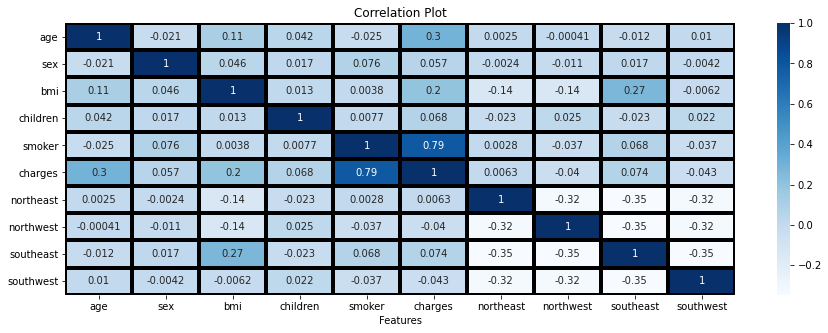

In [12]:
corr_mat = data.corr()
plt.subplots(figsize=(15,5))
sns.heatmap(corr_mat, annot = True, linewidths=3, linecolor='black', cmap = 'Blues')
plt.title('Correlation Plot')
plt.xlabel('Features')
plt.show()

**Importing Scikit Learn and Relevant Libraries**

In [13]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.model_selection import train_test_split # For splitting dataset
from sklearn.metrics import mean_absolute_error, accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, multilabel_confusion_matrix # Evaluation metrics
from sklearn.pipeline import make_pipeline # Creating a Pipeline though not required. Only for efficiency
from sklearn.preprocessing import StandardScaler # Scaling data
from sklearn.linear_model import LinearRegression # Linear Regression Model

**Splitting Data**

In [14]:
# Split dataset into training set and test set. Choose the test_size parameter yourself. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) 

# Printing shapes
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1070, 9) (1070, 1)
Test set: (268, 9) (268, 1)


**Creating a Model**

In [15]:
# Creating a Linear Regression Model after Scaling the data
model = make_pipeline(StandardScaler(), LinearRegression())

In [16]:
model.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [17]:
# Making Predictions
y_pred = model.predict(X_test)

**Evaluation Metrics**

In [18]:
# We can calculate the R^2 value
r_square = model.score(X_test,y_test)
print("R^2 =", r_square)

R^2 = 0.7316890324876621


Know more about interpreting R-Squared value: <br>
https://statisticsbyjim.com/regression/interpret-r-squared-regression/

In [19]:
# We can also calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error = ", mae)

Mean Absolute Error =  4175.792602120548


In [20]:
# Calculating differences between actual and predicted values
residual = y_test - y_pred

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


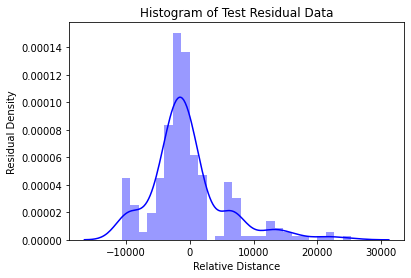

In [21]:
list_1 = []
for i in range(1,residual.shape[0]+1):
    list_1.append(i)

sns.distplot(residual, color ='blue')
plt.ylabel('Residual Density')
plt.xlabel('Relative Distance')
plt.title('Histogram of Test Residual Data')
plt.show()

And so on... 
These are just some of the many things that you can do with your model

##**Part 2: Logistic Regression** <br><br>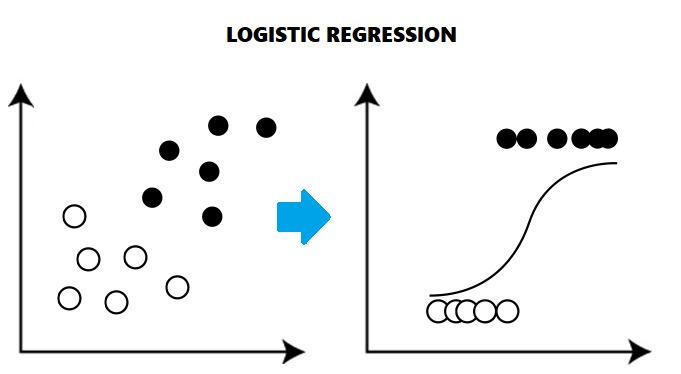

Scikit Learn Reference:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html <br>
More on Logistic Regression: https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc

###**Dataset: Titanic** <br> 
The dataset has been obtained from Kaggle: https://www.kaggle.com/mirichoi0218/insurance <br>


####**Context**<br>
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

####**Columns** <br>
**survival:**	Survival Status	(0 = No, 1 = Yes) <br>
**pclass:**	Ticket class	(1 = 1st, 2 = 2nd, 3 = 3rd) <br>
**sex:** Gender	<br>
**Age:**	Age in years <br> 
**sibsp:**	# of siblings / spouses aboard the Titanic	<br>
**parch:**	# of parents / children aboard the Titanic <br> 
**ticket:**	Ticket number	
**fare:**	Passenger fare	
**cabin:**	Cabin number	
**embarked:**	Port of Embarkation

In [22]:
titanic = pd.read_csv('train.csv')

In [23]:
print("Shape:", titanic.shape)
titanic.head(5)

Shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
titanic.drop(columns=['Name', 'Ticket', 'Cabin', 'PassengerId'], inplace=True)

In [25]:
titanic.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [26]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


**Dealing with Missing Values**

Learn more on Imputation: https://scikit-learn.org/stable/modules/impute.html

In [27]:
from sklearn.impute import KNNImputer

impute_values = titanic.loc[:, ['Pclass','Age', 'SibSp', 'Parch']]
imputer = KNNImputer(n_neighbors=2, weights="uniform")
sub = imputer.fit_transform(impute_values)

In [28]:
sub_data = pd.DataFrame(sub, columns = ['Pclass','Age', 'SibSp', 'Parch'])
titanic.drop(columns=['Pclass','Age', 'SibSp', 'Parch'], inplace= True)
titanic = pd.concat([titanic, sub_data], axis=1, join="inner")

In [29]:
titanic.isnull().sum()


Survived    0
Sex         0
Fare        0
Embarked    2
Pclass      0
Age         0
SibSp       0
Parch       0
dtype: int64

In [30]:
titanic = titanic.dropna()

In [31]:
titanic.isnull().sum()

Survived    0
Sex         0
Fare        0
Embarked    0
Pclass      0
Age         0
SibSp       0
Parch       0
dtype: int64

All Clean!

**Encoding**

In [32]:
# One Hot Encoding
one_hot = pd.get_dummies(titanic['Embarked'])
# Ordinal Encoding
titanic['Sex'] = titanic['Sex'].map({'female': 1, 'male': 2})

titanic.drop(columns=['Embarked'], inplace = True)
titanic= pd.concat([titanic, one_hot], axis=1, join="inner")

In [33]:
titanic.head(5)

,Survived,Sex,Fare,Pclass,Age,SibSp,Parch,C,Q,S
0,0,2,7.2500,3.0,22.0,1.0,0.0,0,0,1
1,1,1,71.2833,1.0,38.0,1.0,0.0,1,0,0
2,1,1,7.9250,3.0,26.0,0.0,0.0,0,0,1
3,1,1,53.1000,1.0,35.0,1.0,0.0,0,0,1
4,0,2,8.0500,3.0,35.0,0.0,0.0,0,0,1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


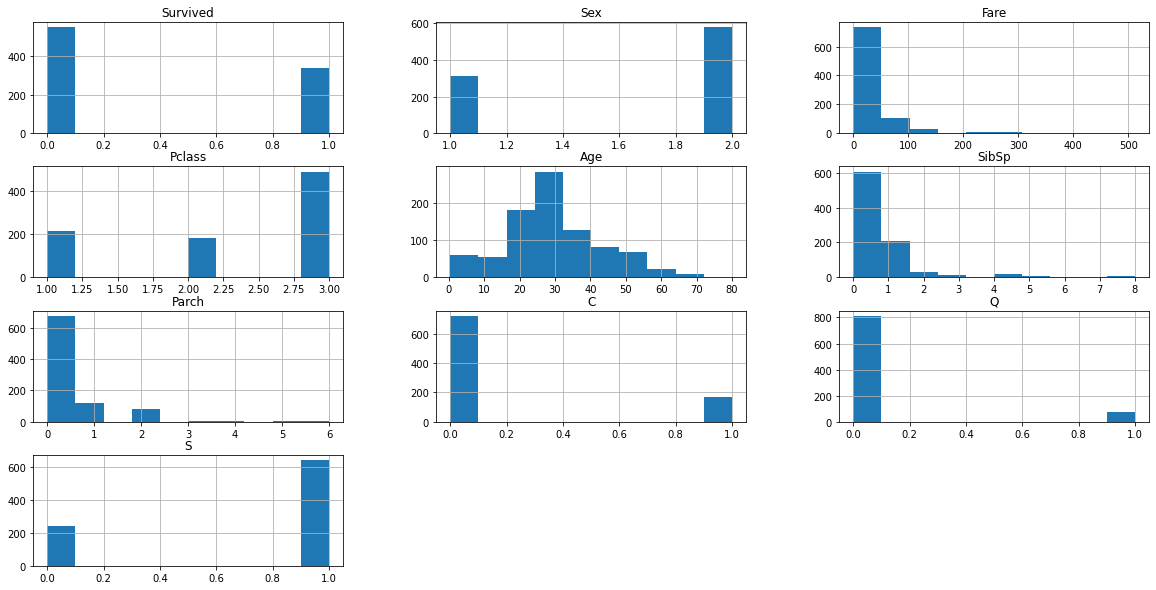

In [34]:
fig = plt.figure(figsize = (20,10))
ax = fig.gca()
titanic.hist(ax=ax)
plt.show()

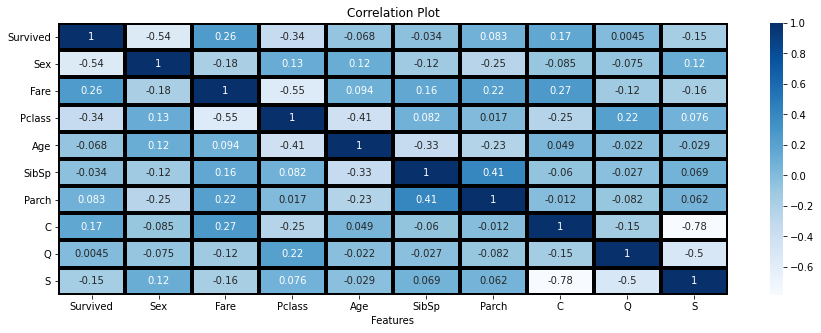

In [35]:
corr_mat = titanic.corr()
plt.subplots(figsize=(15,5))
sns.heatmap(corr_mat, annot = True, linewidths=3, linecolor='black', cmap = 'Blues')
plt.title('Correlation Plot')
plt.xlabel('Features')
plt.show()

In [36]:
X = titanic.loc[:,['Age', 'Sex', 'Fare', 'Pclass', 'SibSp', 'Parch', 'C', 'Q', 'S']].values
y = titanic.loc[:, ['Survived']].values

In [37]:
# Feature Set
print("Shape of Feature Set:", X.shape)
X

Shape of Feature Set: (889, 9)


array([[22.    ,  2.    ,  7.25  , ...,  0.    ,  0.    ,  1.    ],
       [38.    ,  1.    , 71.2833, ...,  1.    ,  0.    ,  0.    ],
       [26.    ,  1.    ,  7.925 , ...,  0.    ,  0.    ,  1.    ],
       ...,
       [13.5   ,  1.    , 23.45  , ...,  0.    ,  0.    ,  1.    ],
       [26.    ,  2.    , 30.    , ...,  1.    ,  0.    ,  0.    ],
       [32.    ,  2.    ,  7.75  , ...,  0.    ,  1.    ,  0.    ]])

In [38]:
# Survived/Not Survived
print("Shape of Y:", y.shape)

Shape of Y: (889, 1)


**Splitting Data**

In [39]:
# Split dataset into training set and test set. Choose the test_size parameter yourself. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) 

# Printing shapes
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (711, 9) (711, 1)
Test set: (178, 9) (178, 1)


**Importing Logistic Regression from Scikit Learn**

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
log = make_pipeline(StandardScaler(), LogisticRegression(random_state=4))
log.fit(X_train, y_train.flatten())

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=4,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [42]:
y_pred = log.predict(X_test)
actual = y_test.flatten() # Changing shape of y_test

**Evalution Metrics**

In [43]:
combined = pd.DataFrame({'Predicted':y_pred, 'Actual':actual})
combined

,Predicted,Actual
0,0,1
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
173,0,0
174,0,0
175,0,0
176,0,0


In [44]:
# Mean Accuracy-Log Score gives us accuracy this time
accuracy = log.score(X_test, y_test)
print("Accuracy =", accuracy*100, "%")

Accuracy = 79.7752808988764 %


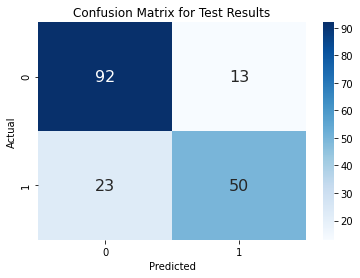

In [45]:
cm2 = confusion_matrix(y_test, y_pred)
sns.heatmap( cm2, annot=True, fmt = 'd', cmap = 'Blues', annot_kws = {'size': 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Test Results')
plt.show()

... And much more to explore in the world of Machine Learning!